In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
file_path = '~/aiffel/AIFFEL_repo/netflix_titles.csv'
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [107]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [108]:
data = data.dropna(subset=['release_year'])

In [109]:
data = data.sort_values( 'release_year', ascending = False )
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,"June 17, 2021",2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou..."
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,"June 2, 2021",2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,"June 4, 2021",2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,"June 4, 2021",2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn..."


In [110]:
data['2010-2021'] = np.where( data['release_year'] == 2022 , '22' ,  np.where( data['release_year'] == 2021, '21',  np.where( data['release_year'] == 2020, '20',  np.where( data['release_year'] == 2019, '19', np.where( data['release_year'] == 2018, '18',  np.where( data['release_year'] == 2017, '17', np.where( data['release_year'] == 2016, '16',  np.where( data['release_year'] == 2015, '15', np.where( data['release_year'] == 2014, '14', np.where( data['release_year'] == 2013, '13', np.where( data['release_year'] == 2012, '12', np.where( data['release_year'] == 2011, '11', np.where( data['release_year'] == 2010, '10', '09~' )))))))))))))

<AxesSubplot:xlabel='2010-2021', ylabel='count'>

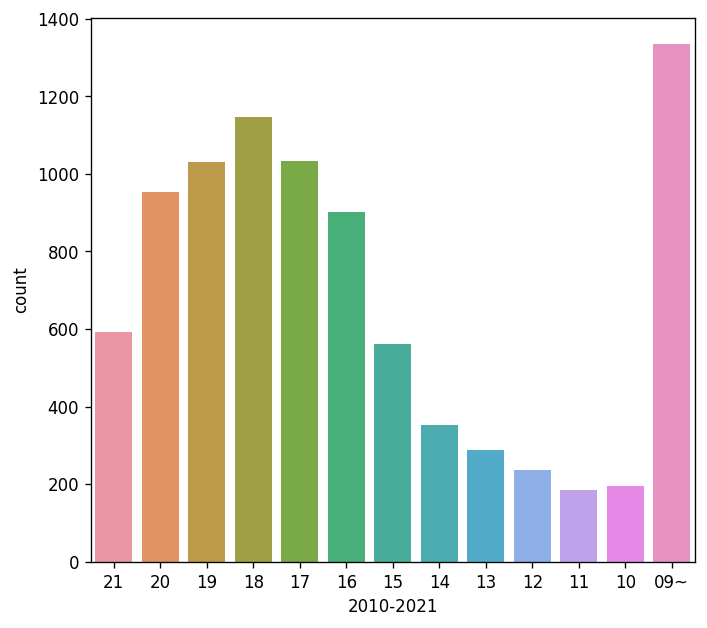

In [111]:
sns.countplot(data = data, x='2010-2021') # 2010년~2021년 사이의 작품의 개수

In [112]:
data['description'] = data['description'].str.replace('[^A-Za-z]',' ', regex=True) # 알파벳만 남김.
data['description'] 

693     After his father s passing  a teenager sets ou...
781     Follow scientists on their quest to understand...
762     Faced with real world opportunities and challe...
763     On a perilous adventure across a post apocalyp...
764     To rekindle their marriages  best friends turn...
                              ...                        
8660    This World War II era training film dramatizes...
8763    Filmmaker John Huston narrates this Oscar nomi...
8205    Director John Ford captures combat footage of ...
7790    Frank Capra s documentary chronicles the rise ...
4250    This collection restores films from women who ...
Name: description, Length: 8807, dtype: object

In [113]:
content= ' '.join(data['description']) #모든 문장들을 하나로 합침.

In [114]:
import nltk  #
import pickle
from nltk.corpus import stopwords
import re

In [115]:
refined_content = content.lower() # 모두 소문자로 전환해줌.
word_tokens = nltk.word_tokenize(refined_content) # 단어 토큰으로 쪼개줌.

In [116]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'john','filmmaker','era','ii','huston','story','year','group','man','series','way','time'] # 직접 만든 불용어 사전
refined_word = [word  for  word  in  word_tokens  if not  word  in stopwords]   # 불용어 제거

In [117]:
tagged_word = nltk.pos_tag(refined_word) # 품사를 각각 태그해줌.

In [118]:
NN_words = []
for word, tag in tagged_word:
    if 'NN' in tag:
        NN_words.append(word)  #명사(NN)만 추출함.

In [119]:
wlem = nltk.WordNetLemmatizer() 

nlp_words = []
for word in NN_words:
    original_word = wlem.lemmatize(word)  # 각 단어의 원형을 찾아줌.
    nlp_words.append(original_word)

In [120]:
from collections import Counter
word_counts = Counter(nlp_words)
print(word_counts.most_common(20)) # 빈도수 기준 상위 20개 단어 출력

[('life', 984), ('family', 712), ('woman', 665), ('world', 590), ('friend', 542), ('school', 347), ('home', 313), ('year', 252), ('team', 243), ('student', 243), ('city', 231), ('crime', 224), ('town', 219), ('murder', 217), ('day', 214), ('war', 213), ('death', 212), ('girl', 206), ('love', 201), ('son', 200)]


In [122]:
df_word = pd.DataFrame({'word':nlp_words})
df_word

,word
0,set
1,york
2,search
3,connection
4,place
...,...
62159,issue
62160,norm
62161,history
62162,cinema


In [128]:
freq_word = df_word.groupby('word', as_index = False).agg(frequency = ('word','count')).sort_values('frequency',ascending = False)
top15 = freq_word.head(15)
top15

,word,frequency
5189,life,984
3186,family,712
9620,woman,665
9643,world,590
3503,friend,542
7755,school,347
4198,home,313
9703,year,252
8755,team,243
8516,student,243


<AxesSubplot:xlabel='frequency', ylabel='word'>

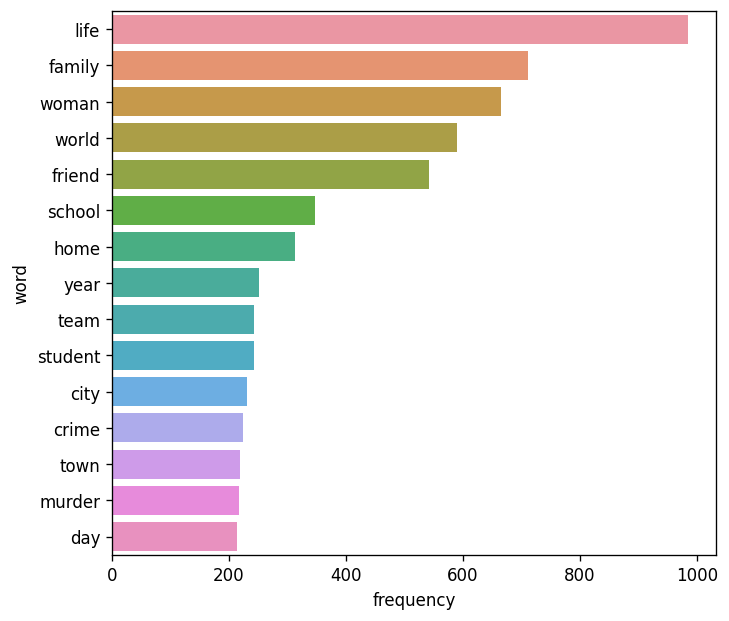

In [150]:
plt.rcParams.update({'font.family' : 'Malgun Gothic',
                     'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

sns.barplot(data = top15, x='frequency', y='word')

In [160]:
dic_word = freq_word.set_index('word').to_dict()['frequency']
dic_word

{'life': 984,
 'family': 712,
 'woman': 665,
 'world': 590,
 'friend': 542,
 'school': 347,
 'home': 313,
 'year': 252,
 'team': 243,
 'student': 243,
 'city': 231,
 'crime': 224,
 'town': 219,
 'murder': 217,
 'day': 214,
 'war': 213,
 'death': 212,
 'girl': 206,
 'love': 201,
 'son': 200,
 'star': 198,
 'power': 197,
 'wife': 196,
 'help': 194,
 'brother': 190,
 'daughter': 190,
 'force': 179,
 'film': 176,
 'show': 169,
 'relationship': 166,
 'comedy': 165,
 'try': 164,
 'adventure': 162,
 'father': 162,
 'drug': 161,
 'battle': 160,
 'boy': 158,
 'child': 158,
 'story': 153,
 'find': 148,
 'game': 146,
 'couple': 145,
 'mother': 145,
 'romance': 145,
 'mission': 145,
 'plan': 142,
 'journey': 142,
 'meet': 137,
 'return': 136,
 'event': 135,
 'history': 134,
 'people': 132,
 'set': 130,
 'marriage': 130,
 'college': 130,
 'cop': 129,
 'career': 129,
 'share': 126,
 'dream': 126,
 'agent': 126,
 'job': 126,
 'music': 124,
 'drama': 122,
 'kid': 122,
 'night': 121,
 'police': 119,
 '

In [161]:
from wordcloud import WordCloud
wc = WordCloud(random_state = 1234,
              font_path = 'THEBOLDFONT.ttf',
              width=400,
              height=400,
              background_color = 'white')

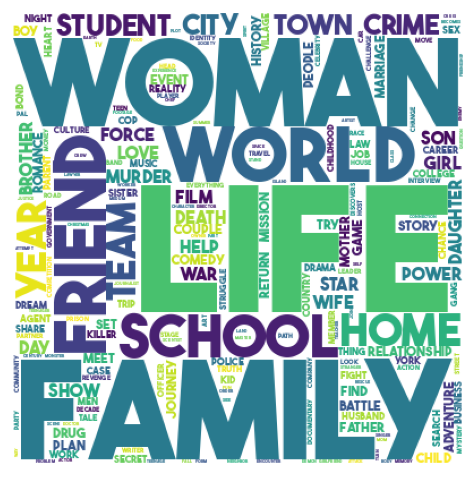

In [163]:
img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(img_wordcloud)